In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [49]:
# load and preview the dataset

data = pd.read_csv('C:/Users/ejhajee/Downloads/HackathonResources20201219/data/train.csv')


## Total number of features available , Missing values , their datatypes and their Types 

In [50]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          79210 non-null  int64  
 1   disbursed_amount                     79210 non-null  int64  
 2   asset_cost                           79210 non-null  int64  
 3   ltv                                  79210 non-null  float64
 4   branch_id                            79210 non-null  int64  
 5   supplier_id                          79210 non-null  int64  
 6   manufacturer_id                      79210 non-null  int64  
 7   current_pincode_id                   79210 non-null  int64  
 8   date_of_birth                        25911 non-null  object 
 9   employment_type                      76294 non-null  object 
 10  disbursaldate                        79185 non-null  object 
 11  state_id                    

In [51]:
data.head()

,customer_id,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,...,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
0,278331,33454,81230,41.34,64,23682,86,6577,NaN,Salaried,...,0,0,0,0,0,0,0,0,0,0
1,273442,38519,83511,48.32,8,23388,45,5657,01-01-1987,Self employed,...,0,0,0,0,0,0,0,0,0,0
2,135417,48647,68297,78.54,16,18059,86,2946,NaN,Self employed,...,0,0,0,0,0,0,0,0,0,1
3,218865,43775,60398,70.82,104,24132,86,7296,01-01-1980,Self employed,...,0,0,0,0,0,0,0,0,0,0
4,195543,45145,62650,74.29,65,22871,120,997,01-01-1990,Salaried,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data.shape

(79210, 41)

In [53]:
data.describe()

,customer_id,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,state_id,employee_code_id,...,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
count,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,...,7.921000e+04,7.921000e+04,7.921000e+04,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000,79210.000000
mean,311205.514468,54373.342608,75113.071165,75.337312,72.408383,19489.261015,70.093094,3342.542621,7.159058,1531.144679,...,6.105680e+03,5.398753e+03,1.109649e+04,121.262315,0.384926,0.095013,8.590683,16.088688,0.178298,0.203156
std,108506.933745,12693.243730,17424.375193,11.285616,68.703384,3508.666653,22.476729,2188.088812,4.431790,968.860853,...,1.138702e+05,9.955199e+04,9.316931e+04,3676.676815,0.936074,0.383327,13.373491,27.017550,0.636051,0.402350
min,123460.000000,13990.000000,38116.000000,19.570000,1.000000,12312.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,217297.750000,47151.750000,65832.000000,69.670000,15.000000,16294.000000,48.000000,1511.000000,4.000000,700.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,311293.000000,53803.000000,70708.000000,77.320000,63.000000,18694.000000,86.000000,2949.000000,6.000000,1427.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,404711.750000,60447.000000,78110.000000,84.140000,121.000000,22980.000000,86.000000,5437.000000,9.000000,2311.000000,...,0.000000e+00,0.000000e+00,1.950000e+03,0.000000,0.000000,0.000000,13.000000,24.000000,0.000000,0.000000
max,499996.000000,179176.000000,254177.000000,94.960000,261.000000,24779.000000,145.000000,7337.000000,22.000000,3780.000000,...,6.950353e+06,6.686746e+06,5.653513e+06,364153.000000,16.000000,7.000000,90.000000,166.000000,15.000000,1.000000


## Target feature and its distribution

In [54]:
data['loan_default'].value_counts()

0    63118
1    16092
Name: loan_default, dtype: int64

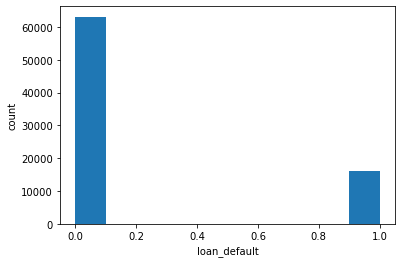

In [55]:
# distribution of loan default  charges

plt.hist(data['loan_default'])
plt.xlabel('loan_default')
plt.ylabel('count')
plt.show()


## Unique Values of Categorical Columns

In [56]:
print(data['employment_type'].value_counts())
#print(data['perform_cns_score_description'].value_counts())
#print(data['date_of_birth'].value_counts())

Self employed    44261
Salaried         32033
Name: employment_type, dtype: int64


## Explore Data

### 1. Hypothesis Generation 
Emplyment Type with Loan_default
cns score desc w with Loan_default

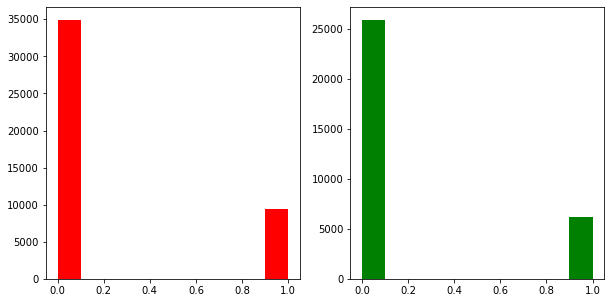

In [57]:
# distribution of loan dafaukt as per the employment type

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(data[(data['employment_type'] == "Self employed")]['loan_default'],color="red")

plt.subplot(122)
plt.hist(data[(data['employment_type'] == "Salaried")]['loan_default'],color="green")
plt.show()

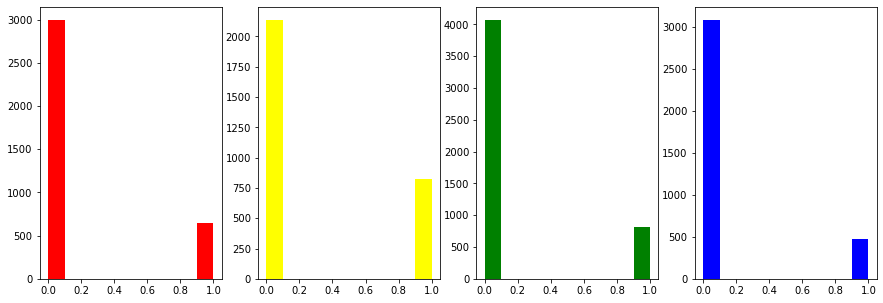

In [58]:
plt.figure(figsize=(15,5))

plt.subplot(141)
plt.hist(data[(data['perform_cns_score_description'] == "F-Low Risk")]['loan_default'],color="red")

plt.subplot(142)
plt.hist(data[(data['perform_cns_score_description'] == "M-Very High Risk")]['loan_default'],color="yellow")

plt.subplot(143)
plt.hist(data[(data['perform_cns_score_description'] == "A-Very Low Risk")]['loan_default'],color="green")
plt.subplot(144)
plt.hist(data[(data['perform_cns_score_description'] == "D-Very Low Risk")]['loan_default'],color="blue")

plt.show()

## Univariate Analysis for all the numerical columns 

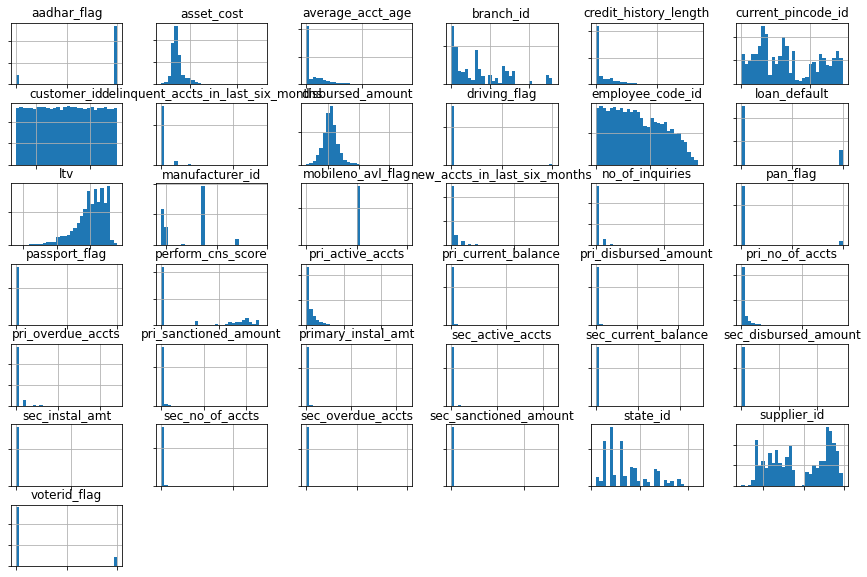

In [59]:
ax = data.hist(bins=30, figsize=(15, 10))
# disable axis labels to avoid the clutter
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])


In [60]:
#data.boxplot([column='disbursed_amount'])

## For Categorical Columns 

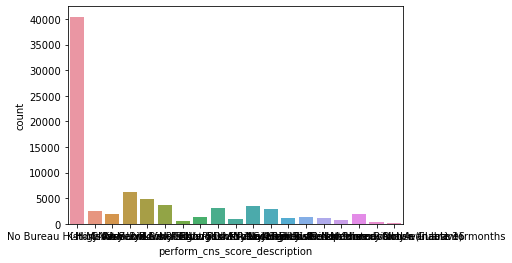

In [61]:
sns.countplot(data['perform_cns_score_description']);


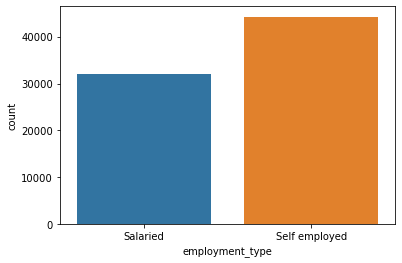

In [62]:
sns.countplot(data['employment_type']);


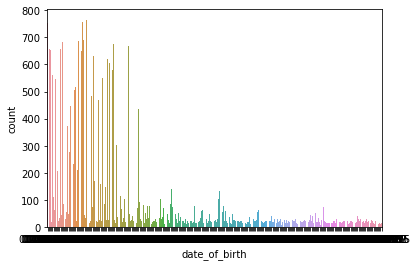

In [63]:
sns.countplot(data['date_of_birth']);


## Analysing relationship between Numerical and target 

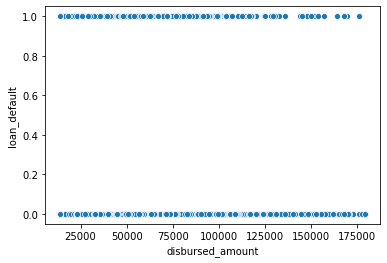

In [64]:
sns.scatterplot(x=data['disbursed_amount'], y=data['loan_default']);

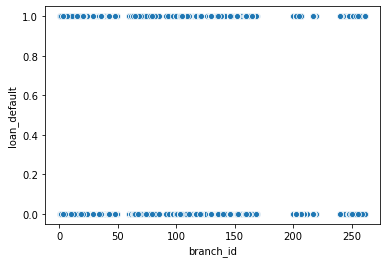

In [65]:
sns.scatterplot(x=data['branch_id'], y=data['loan_default']);

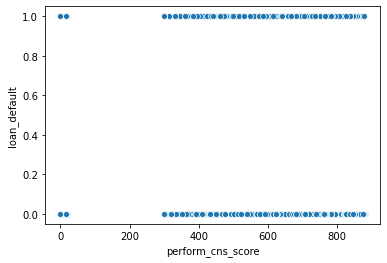

In [66]:
sns.scatterplot(x=data['perform_cns_score'], y=data['loan_default']);

In [67]:
 
categorical = [
  'employment_type', 'date_of_birth', 'perform_cns_score_description'
]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BFD068D30>,
      dtype=object)

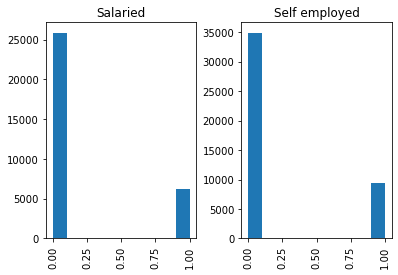

In [68]:
data.loan_default.hist(by=data.employment_type)


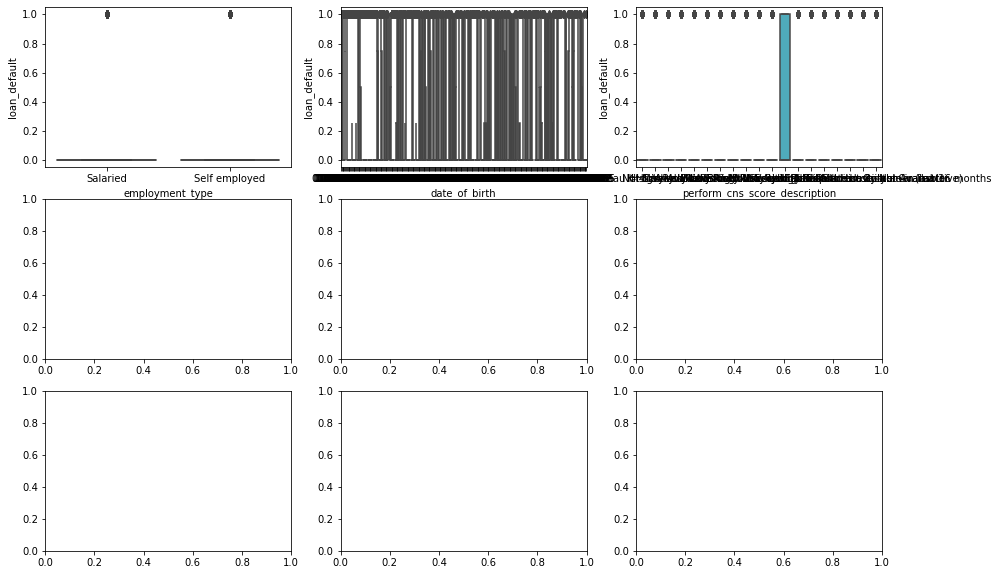

In [69]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='loan_default', data=data, ax=subplot)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BFE682190>,
      dtype=object)

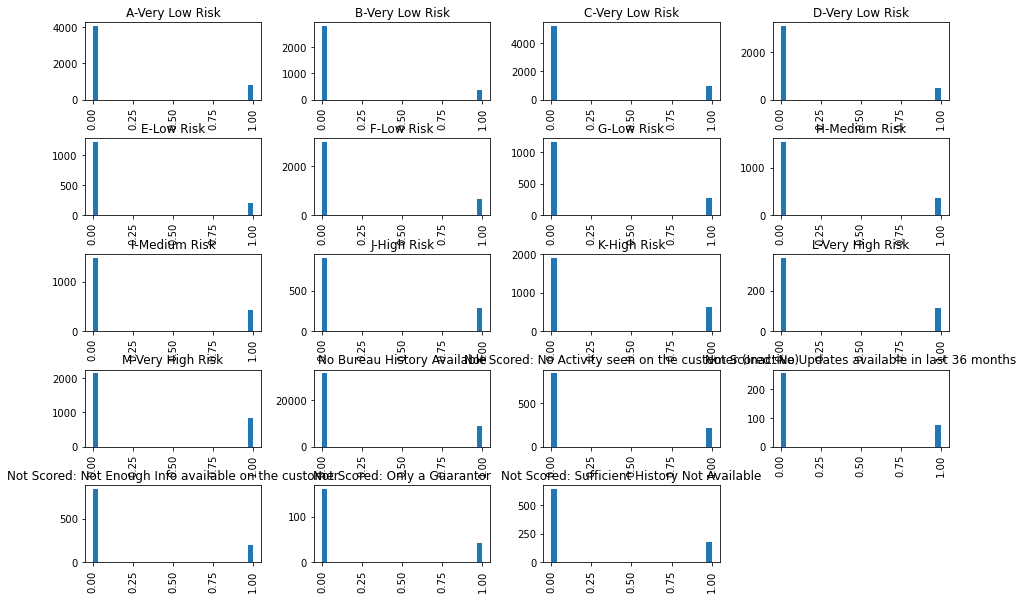

In [70]:
data.loan_default.hist(by=data.perform_cns_score_description,bins=30, figsize=(15, 10))


## Handling Outliers 


In [71]:
Q1,Q3 = data['average_acct_age'].quantile([0.25,0.75])
IQR= Q3-Q1
print(IQR)
upper_range = Q3 + (1.5*IQR)
print(upper_range)
lower_range = Q3 + (1.5*IQR)
print(upper_range)

   
     

13.0
32.5
32.5


## Handling the Missing /Non null values for date_of_birth


In [72]:
print(data['date_of_birth'].isnull().sum())
print(data['disbursaldate'].isnull().sum())
print(data['employment_type'].isnull().sum())




53299
25
2916


In [73]:
mode_data =data['date_of_birth'].mode().values[0]
mode_datadisb =data['disbursaldate'].mode().values[0]
mode_emptype =data['employment_type'].mode().values[0]


In [74]:
data['date_of_birth'] = data['date_of_birth'].replace(np.nan,mode_data)
data['disbursaldate'] = data['disbursaldate'].replace(np.nan,mode_datadisb)
data['employment_type'] = data['employment_type'].replace(np.nan,mode_emptype)

In [75]:
print(data['date_of_birth'].isnull().sum())
print(data['disbursaldate'].isnull().sum())
print(data['employment_type'].isnull().sum())

0
0
0


## Fetaure Engineering 


In [76]:
#Date Encoding 
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'])

#Create feature of day
data['day']= data['date_of_birth'].dt.day
#Create feature of month
data['month']= data['date_of_birth'].dt.month
#Create fetaure of year
data['year']= data['date_of_birth'].dt.year


#Drop date_of_birth Column 
data.drop(columns='date_of_birth',inplace=True)   

## Removing irrelevant columns 

In [77]:
#Remove the customer_id as it doesnt have  any add on value 
data.drop(columns=['customer_id'],inplace = True)


In [78]:
#Date Encoding 
data['disbursaldate'] = pd.to_datetime(data['disbursaldate'])

#Create feature of day
data['D_day']= data['disbursaldate'].dt.day
#Create feature of month
data['D_month']= data['disbursaldate'].dt.month
#Drop date_of_birth Column 
data.drop(columns='disbursaldate',inplace=True)   

In [79]:
#Handling duplicate columns 
duplicate = data.duplicated()
print(duplicate.sum())

0


## Label Encoding 

In [80]:
from sklearn.preprocessing import LabelEncoder

 
le = LabelEncoder()
le.fit(data['employment_type'])
data['employment_type'] = le.transform(data['employment_type'])

# One_Hot Encoding 

In [81]:
data['perform_cns_score_description'].replace("Not Scored: Not Enough Info available on the customer","Not_Scored",inplace=True)
data['perform_cns_score_description'].replace("Not Scored: Sufficient History Not Available","Not_Scored",inplace=True)
data['perform_cns_score_description'].replace("Not Scored: No Updates available in last 36 months","Not_Scored",inplace=True)
data['perform_cns_score_description'].replace("Not Scored: Only a Guarantor","Not_Scored",inplace=True)
data['perform_cns_score_description'].replace("Not Scored: No Activity seen on the customer (Inactive)","Not_Scored",inplace=True)


In [82]:
data['perform_cns_score_description'].value_counts()

No Bureau History Available    40439
C-Very Low Risk                 6207
A-Very Low Risk                 4882
F-Low Risk                      3643
D-Very Low Risk                 3560
Not_Scored                      3451
B-Very Low Risk                 3161
M-Very High Risk                2960
K-High Risk                     2550
I-Medium Risk                   1916
H-Medium Risk                   1901
G-Low Risk                      1431
E-Low Risk                      1430
J-High Risk                     1197
L-Very High Risk                 475
Name: perform_cns_score_description, dtype: int64

In [83]:
data =  pd.get_dummies(data,drop_first =True) 

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 56 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   disbursed_amount                                           79210 non-null  int64  
 1   asset_cost                                                 79210 non-null  int64  
 2   ltv                                                        79210 non-null  float64
 3   branch_id                                                  79210 non-null  int64  
 4   supplier_id                                                79210 non-null  int64  
 5   manufacturer_id                                            79210 non-null  int64  
 6   current_pincode_id                                         79210 non-null  int64  
 7   employment_type                                            79210 non-null  int32  
 8   state_

## 1. Multicollinearlity in independent variables


In [85]:
#list of indepenedent and depenedent variable
x_cols = data.drop(columns='loan_default').copy()
y_cols=data['loan_default'].copy()
x_cols.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,employment_type,state_id,employee_code_id,...,perform_cns_score_description_F-Low Risk,perform_cns_score_description_G-Low Risk,perform_cns_score_description_H-Medium Risk,perform_cns_score_description_I-Medium Risk,perform_cns_score_description_J-High Risk,perform_cns_score_description_K-High Risk,perform_cns_score_description_L-Very High Risk,perform_cns_score_description_M-Very High Risk,perform_cns_score_description_No Bureau History Available,perform_cns_score_description_Not_Scored
0,33454,81230,41.34,64,23682,86,6577,0,13,1087,...,0,0,0,0,0,0,0,0,1,0
1,38519,83511,48.32,8,23388,45,5657,1,3,924,...,0,0,0,0,0,0,0,0,1,0
2,48647,68297,78.54,16,18059,86,2946,1,14,1127,...,0,0,0,0,0,0,0,0,1,0
3,43775,60398,70.82,104,24132,86,7296,1,13,1106,...,0,0,0,0,0,0,0,0,1,0
4,45145,62650,74.29,65,22871,120,997,0,6,2396,...,0,0,0,0,0,0,0,0,1,0


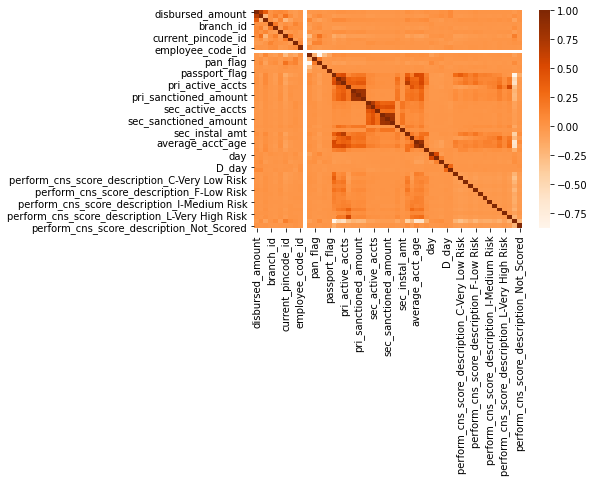

In [86]:

sns.heatmap(x_cols.corr(),cmap='Oranges')

In [87]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x_cols.values, i) for i in range(x_cols.shape[1])]
vif["features"] = x_cols.columns

vif

,VIF Factor,features
0,4.735823,disbursed_amount
1,4.282196,asset_cost
2,2.715313,ltv
3,1.054805,branch_id
4,1.087220,supplier_id
5,1.026659,manufacturer_id
6,1.260402,current_pincode_id
7,1.061264,employment_type
8,1.062590,state_id
9,1.018607,employee_code_id


## Insignificant Columns as per VIF

In [88]:
insignificant_cols = ['mobileno_avl_flag','aadhar_flag','voterid_flag','perform_cns_score','perform_cns_score_description_No Bureau History Available','perform_cns_score_description_Not Scored: Not Enough Info available on the customer','perform_cns_score_description_Not Scored: No Activity seen on the customer (Inactive)','perform_cns_score_description_M-Very High Risk']


## Split the dataset 

In [89]:
# split the dataset in train and test set

X_train, X_test, y_train, y_test = train_test_split(x_cols,y_cols, test_size=0.25, random_state = 42)

In [90]:
# check the train and test set sizes
print(X_train.shape)
print(X_test.shape)

(59407, 55)
(19803, 55)


In [91]:
num_cols = ['asset_cost', 'branch_id', 'supplier_id', 'manufacturer_id', 'current_pincode_id', 'state_id','employee_code_id','mobileno_avl_flag','aadhar_flag','pan_flag','voterid_flag','driving_flag','passport_flag','perform_cns_score','pri_no_of_accts','pri_active_accts','pri_overdue_accts','pri_current_balance','pri_sanctioned_amount','pri_disbursed_amount','sec_no_of_accts','sec_active_accts','sec_overdue_accts','sec_current_balance','sec_sanctioned_amount','sec_disbursed_amount','primary_instal_amt','sec_instal_amt','new_accts_in_last_six_months','delinquent_accts_in_last_six_months','average_acct_age','credit_history_length','no_of_inquiries','day','month','year','D_day','D_month']

In [92]:
# scale the numerical variables use for loop for all the variables

from sklearn.preprocessing import StandardScaler

# create copy of X_train and x_test

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# for loop for scaling each numerical variable
for col in num_cols:
    scaler = StandardScaler()
    scaler.fit(X_train_scaled[col].values.reshape(-1,1))

    X_train_scaled[col] = scaler.transform(X_train_scaled[col].values.reshape(-1,1))
    X_test_scaled[col] = scaler.transform(X_test_scaled[col].values.reshape(-1,1))

# add constant to the scaled variables


In [93]:
X_train_scaled_constant = sm.add_constant(X_train_scaled)
X_test_scaled_constant = sm.add_constant(X_test_scaled)

In [96]:
# fit the model with only significant features
insignificant_cols = ['mobileno_avl_flag','aadhar_flag','voterid_flag','perform_cns_score','perform_cns_score_description_Not_Scored']


logit_model1 = sm.Logit(y_train, X_train_scaled_constant.drop(columns=insignificant_cols)).fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.490152
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:                59407
Model:                          Logit   Df Residuals:                    59356
Method:                           MLE   Df Model:                           50
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                 0.03024
Time:                        20:44:09   Log-Likelihood:                -29118.
converged:                       True   LL-Null:                       -30027.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const         

In [97]:
#significant_cols =['no_of_inquiries','year','perform_cns_score_description_No Bureau History Available','perform_cns_score_description_L-Very High Risk','perform_cns_score_description_I-Medium Risk','D_day','perform_cns_score_description_J-High Risk','perform_cns_score_description_B-Very Low Risk','current_pincode_id','perform_cns_score_description_K-High Risk','employment_type','state_id','pri_no_of_accts','pri_active_accts','delinquent_accts_in_last_six_months','credit_history_length']
significant_cols =['disbursed_amount','asset_cost','ltv','manufacturer_id','current_pincode_id','employment_type','state_id','employee_code_id','pri_no_of_accts','pri_active_accts','pri_overdue_accts','pri_current_balance','delinquent_accts_in_last_six_months','average_acct_age','credit_history_length','no_of_inquiries','year','perform_cns_score_description_B-Very Low Risk','perform_cns_score_description_C-Very Low Risk','perform_cns_score_description_D-Very Low Risk','perform_cns_score_description_E-Low Risk']

In [98]:
# fit the model with only significant features
#significant_cols =['no_of_inquiries','year','perform_cns_score_description_No Bureau History Available','perform_cns_score_description_L-Very High Risk','perform_cns_score_description_I-Medium Risk','D_day','perform_cns_score_description_J-High Risk','perform_cns_score_description_B-Very Low Risk','current_pincode_id','perform_cns_score_description_K-High Risk','employment_type','state_id','pri_no_of_accts','pri_active_accts','delinquent_accts_in_last_six_months','credit_history_length']
logit_model1 = sm.Logit(y_train, X_train_scaled_constant[significant_cols]).fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.508123
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:                59407
Model:                          Logit   Df Residuals:                    59386
Method:                           MLE   Df Model:                           20
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:               -0.005312
Time:                        20:44:16   Log-Likelihood:                -30186.
converged:                       True   LL-Null:                       -30027.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
disbursed_amount                      

In [99]:
significant_cols =['disbursed_amount','asset_cost','ltv','employment_type','state_id','employee_code_id','pri_no_of_accts','pri_active_accts','pri_overdue_accts','pri_current_balance','delinquent_accts_in_last_six_months','average_acct_age','credit_history_length','no_of_inquiries','year','perform_cns_score_description_B-Very Low Risk','perform_cns_score_description_C-Very Low Risk','perform_cns_score_description_D-Very Low Risk','perform_cns_score_description_E-Low Risk']
logit_model1 = sm.Logit(y_train, X_train_scaled_constant[significant_cols]).fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.508134
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           loan_default   No. Observations:                59407
Model:                          Logit   Df Residuals:                    59388
Method:                           MLE   Df Model:                           18
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:               -0.005332
Time:                        20:44:18   Log-Likelihood:                -30187.
converged:                       True   LL-Null:                       -30027.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
disbursed_amount                      

In [103]:
from sklearn import metrics 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_curve 
dec_model = DecisionTreeClassifier().fit(X_train_scaled[significant_cols], y_train) 
y_test_pred_prob_dec = dec_model.predict_proba(X_test_scaled[significant_cols])[:,1]

THRESHOLD = 0.1

y_test_pred_new_dec = np.where(y_test_pred_prob_dec > THRESHOLD, 1, 0) 
print(metrics.classification_report(y_test,y_test_pred_new_dec))
print(metrics.f1_score(y_test,y_test_pred_new_dec))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     15810
           1       0.22      0.24      0.23      3993

    accuracy                           0.68     19803
   macro avg       0.51      0.51      0.51     19803
weighted avg       0.69      0.68      0.68     19803

0.23106608779546553


In [104]:
from sklearn import metrics

metrics.confusion_matrix(y_test, y_test_pred_new_dec, [1,0])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[  958,  3035],
       [ 3341, 12469]], dtype=int64)

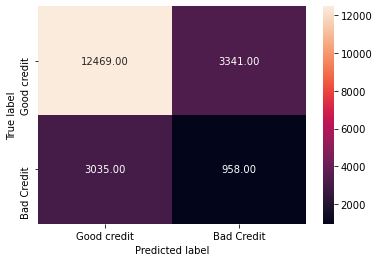

In [105]:
from sklearn import metrics 

def draw_cm( actual, predicted ):   
    
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )    
    
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    
    cm = [[tp,fn],[fp,tn]]
    
    sns.heatmap(cm, annot=True,fmt='.2f', 
               xticklabels = ["Good credit", "Bad Credit"] ,
               yticklabels = ["Good credit", "Bad Credit"] )   
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')    
    plt.show()

draw_cm(y_test, y_test_pred_new_dec)

## F1 Score and Accuracy Score

In [106]:
print(metrics.accuracy_score(y_test, y_test_pred_new_dec))
print(metrics.f1_score(y_test, y_test_pred_new_dec))

0.6780285815280513
0.23106608779546553


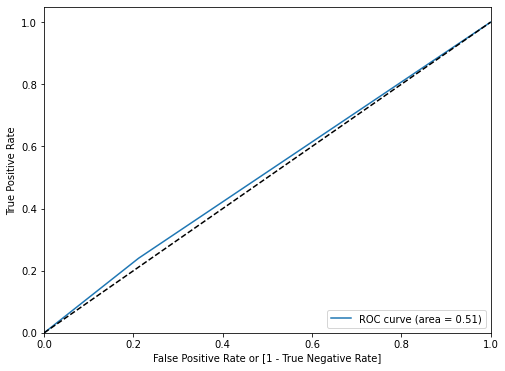

In [107]:
def draw_roc( actual, probs ): 
    
    # Obtain fpr,tpr and thresholds
    fpr,tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )   
    auc_score = metrics.roc_auc_score( actual, probs )    
    
    plt.figure(figsize=(8, 6))   
    # plot fpr,tpr  for various thresholds
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )    
    # Draw diagonal line from origin to extreme right top
    plt.plot([0, 1], [0, 1], 'k--')   
    plt.xlim([0.0, 1.0])   
    plt.ylim([0.0, 1.05])   
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')   
    plt.ylabel('True Positive Rate')   
    plt.legend(loc="lower right")   
    plt.show()  
    return fpr, tpr, thresholds 

fpr, tpr, thresholds = draw_roc(y_test, y_test_pred_new_dec)

## F1 Score with Other models 

In [108]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
     
    ]


In [109]:
for classifier in classifiers:
    model = classifier
    model.fit(X_train_scaled[significant_cols], y_train)
    y_test_pred_prob_dec = model.predict_proba(X_test_scaled[significant_cols])[:,1] 
    THRESHOLD = 0.163698
    y_test_pred_new= np.where(y_test_pred_prob_dec > THRESHOLD, 1, 0) 
    print(classifier)
    print(metrics.classification_report(y_test,y_test_pred_new))
    print(metrics.f1_score(y_test,y_test_pred_new))
    print('*'*50)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.83      0.00      0.01     15810
           1       0.20      1.00      0.34      3993

    accuracy                           0.20     19803
   macro avg       0.52      0.50      0.17     19803
weighted avg       0.70      0.20      0.07     19803

0.3355936486543402
**************************************************
KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.81      0.53      0.64     15810
           1       0.21      0.51      0.30      3993

    accuracy                           0.52     19803
   macro avg       0.51      0.52      0.47     19803
weighted avg       0.69      0.52      0.57     19803

0.3024065161051462
**************************************************
DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     15810
           1   

## Prediction with test data.csv

In [111]:

data_test = pd.read_csv('C:/Users/ejhajee/Downloads/HackathonResources20201219/data/test.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19874 entries, 0 to 19873
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19874 non-null  int64  
 1   disbursed_amount                     19874 non-null  int64  
 2   asset_cost                           19874 non-null  int64  
 3   ltv                                  19874 non-null  float64
 4   branch_id                            19874 non-null  int64  
 5   supplier_id                          19874 non-null  int64  
 6   manufacturer_id                      19874 non-null  int64  
 7   current_pincode_id                   19874 non-null  int64  
 8   date_of_birth                        6592 non-null   object 
 9   employment_type                      19159 non-null  object 
 10  disbursaldate                        19869 non-null  object 
 11  state_id                    

In [112]:
mode_data_test =data_test['date_of_birth'].mode().values[0]
mode_datadisb_test =data_test['disbursaldate'].mode().values[0]
mode_emptype_test =data_test['employment_type'].mode().values[0]
mode_avg_test =data_test['average_acct_age'].mode().values[0]

data_test['date_of_birth'] = data_test['date_of_birth'].replace(np.nan,mode_data_test)
data_test['disbursaldate'] = data_test['disbursaldate'].replace(np.nan,mode_datadisb_test)
data_test['employment_type'] = data_test['employment_type'].replace(np.nan,mode_emptype_test)
data_test['average_acct_age'] = data_test['average_acct_age'].replace(np.nan,mode_avg_test)

print(data_test['employment_type'].isnull().sum())
print(data_test['disbursaldate'].isnull().sum())
print(data_test['date_of_birth'].isnull().sum())
print(data_test['average_acct_age'].isnull().sum())





0
0
0
0


In [113]:
#Date Encoding 
data_test['date_of_birth'] = pd.to_datetime(data_test['date_of_birth'])

#Create feature of day
data_test['day']= data_test['date_of_birth'].dt.day
#Create feature of month
data_test['month']= data_test['date_of_birth'].dt.month
#Create fetaure of year
data_test['year']= data_test['date_of_birth'].dt.year

#Date Encoding 
data_test['disbursaldate'] = pd.to_datetime(data_test['disbursaldate'])

#Create feature of day
data_test['D_day']= data_test['disbursaldate'].dt.day
#Create feature of month
data_test['D_month']= data_test['disbursaldate'].dt.month
 
#Drop date_of_birth Column 
data_test.drop(columns='date_of_birth',inplace=True)   
data_test.drop(columns='disbursaldate',inplace=True)   


In [117]:
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()
le.fit(data_test['employment_type'])
data_test['employment_type'] = le.transform(data_test['employment_type'])


In [118]:
 
data_test =  pd.get_dummies(data_test,drop_first =True) 

In [120]:
 

y_test_pred_test =dec_model.predict(data_test)


ValueError: Number of features of the model must match the input. Model n_features is 19 and input n_features is 302 

In [ ]:
print(y_test_pred_test)
 

In [ ]:
sample = pd.read_csv('C:\\Users\\sumajhi\\Desktop\\data\\sample_submission.csv')
sample.head()

In [ ]:
submission = pd.DataFrame({
    'customer_id': data_test['customer_id'],
    'loan_default': y_test_pred_test
})
submission.head()

In [ ]:
submission.to_csv('C:\\Users\\sumajhi\\Desktop\\data\\submission.csv', index=False)